# Clustering single augmentation

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
parent_dir1 = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(parent_dir1)

import numpy as np
import matplotlib.pyplot as plt
import hdbscan

import matplotlib.pyplot as plt
from lightly.loss import NTXentLoss

import simspice.utils.inverse_mapping_functions as imf
# import simspice.models.Siamese_Architecture as SA
# import simspice.models.Siamese_Architecture_Transformer as SA
import simspice.models.Siamese_Architecture_Resnet as SA
import wandb
import tqdm
from datetime import datetime

plt.rcParams['image.origin'] = 'lower'

In [2]:
simspice = "/d0/tvaresano/SimSPICE/"
os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"

In [5]:
id = 'resnet50_SimCLR_NeMg_gain05-3'

In [6]:
stacked_outputs = np.load(simspice+f'notebooks/jobs/model_outputs/stacked_outputs_single32_full_{id}.npy')

In [7]:
for x in [10, 20, 30]:
    for y in tqdm.tqdm([5, 10, 15]):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=x, min_samples=y, metric='euclidean') # <=> cosine?
        clusterer.fit(stacked_outputs)
        labels = clusterer.labels_
        np.save(simspice+f'notebooks/jobs/clustering/{id}_minclus{x}_minsamp{y}.npy', labels)

  0%|          | 0/3 [00:00<?, ?it/s]/d0/tvaresano/.conda/envs/simspice/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/d0/tvaresano/.conda/envs/simspice/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
 33%|███▎      | 1/3 [01:03<02:06, 63.38s/it]/d0/tvaresano/.conda/envs/simspice/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/d0/tvaresano/.conda/envs/simspice/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
 67%|██████▋   | 2/3 [01:51<00:54, 54.66s/

Unique Clusters: 14
Unique Clusters: 9
Unique Clusters: 5
Unique Clusters: 7
Unique Clusters: 5
Unique Clusters: 4
Unique Clusters: 4
Unique Clusters: 4
Unique Clusters: 4


Text(0.5, 0.98, 'Feb23_resnet50_SimCLR_NeMg_gain05-3')

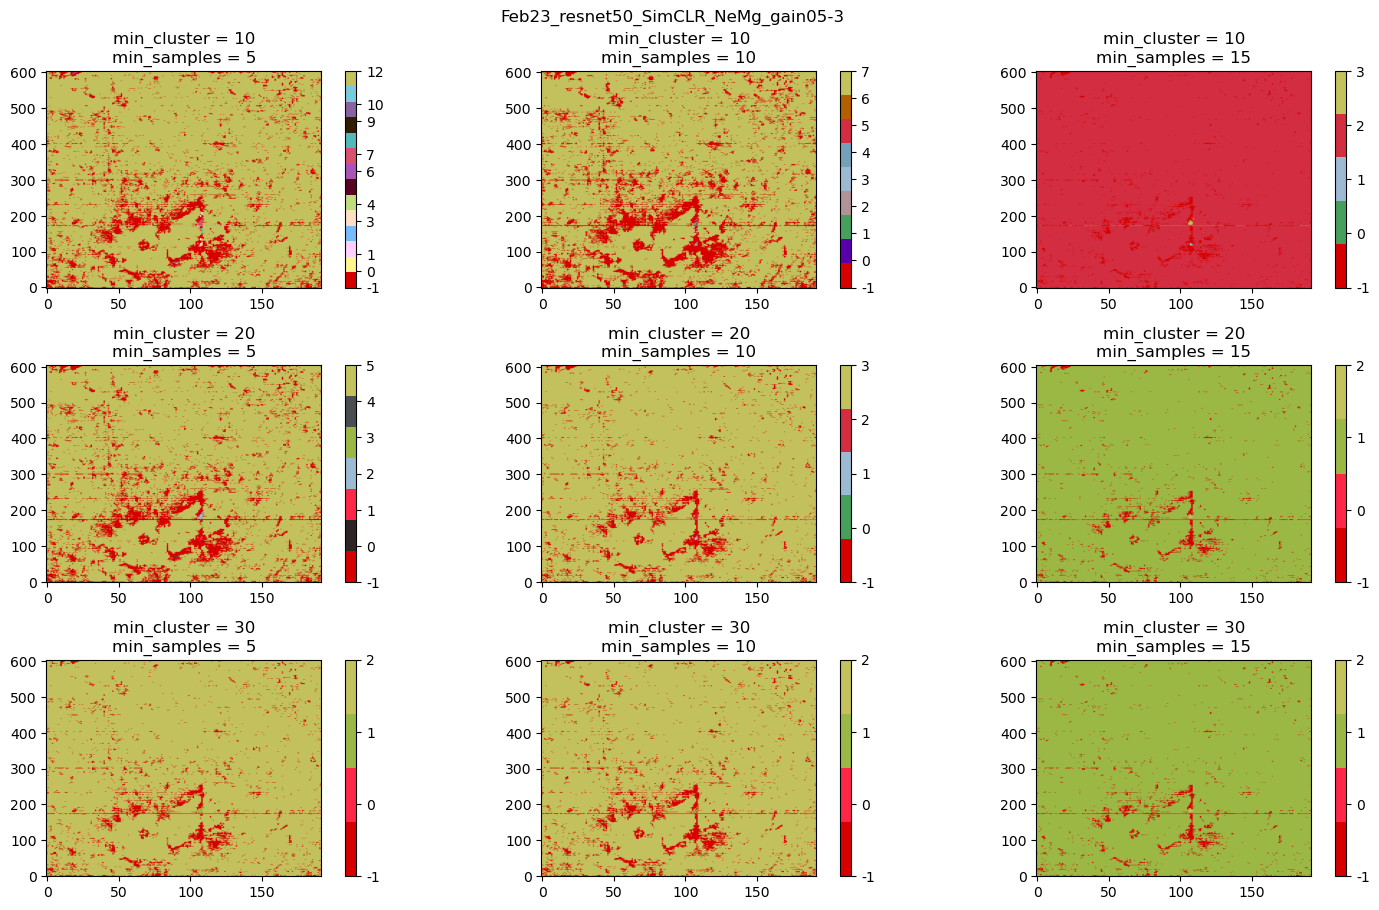

In [8]:
c=0
plt.figure(figsize=(15,12), tight_layout=True)
for x in [10, 20, 30]:
    for y in [5, 10, 15]:
        c+=1
        plt.subplot(4,3,c)
        labels = np.load(simspice+f'notebooks/jobs/clustering/{id}_minclus{x}_minsamp{y}.npy')
        imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=None)
        plt.title(f"min_cluster = {x}\nmin_samples = {y}")
plt.suptitle(f'Feb23_{id}')